<a href="https://colab.research.google.com/github/drcruzm/orange/blob/main/examenInventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# -------------------------------------------------
# Parámetros de generación
# -------------------------------------------------
np.random.seed(2025) # reproducibilidad
n = 50               # número de observaciones

# Variables independientes (distribuciones plausibles)
ventas_previas   = np.random.normal(loc=1200, scale=300, size=n).clip(min=0)
gasto_publicidad = np.random.normal(loc=80,   scale=20,  size=n).clip(min=0) # miles de USD
temp_media       = np.random.normal(loc=5,    scale=3,   size=n)  # °C
dias_hasta_nav   = np.random.randint(30, 120, size=n)   # días
competencia      = np.random.randint(0, 11, size=n) # índice 0‑10

# Coeficientes "reales" (puedes modificarlos)
β0 = 200          # intercepto
β1 = 0.45         # ventas_previas
β2 = 3.2          # gasto_publicidad
β3 = -12.0        # temp_media
β4 = -1.5         # dias_hasta_nav
β5 = -20.0        # competencia

# Ruido aleatorio (error)
ε = np.random.normal(loc=0, scale=150, size=n)

# Variable objetivo (inventario)
inventario = (β0 +
              β1 * ventas_previas +
              β2 * gasto_publicidad +
              β3 * temp_media +
              β4 * dias_hasta_nav +
              β5 * competencia +
              ε).round().astype(int)

# -------------------------------------------------
# Construcción del DataFrame
# -------------------------------------------------
df = pd.DataFrame({
    "ventas_previas":   ventas_previas.round(2),
    "gasto_publicidad": gasto_publicidad.round(2),
    "temp_media":       temp_media.round(2),
    "dias_hasta_nav":   dias_hasta_nav,
    "competencia":      competencia,
    "inventario":       inventario
})

# Guardar como CSV (opcional)
df.to_csv("inventario_navidad.csv", index=False)

# Mostrar las primeras 10 filas
print(df.head(5))

In [2]:
import statsmodels.api as sm

# Variables independientes (añadir constante para el intercepto)
X = df[["ventas_previas", "gasto_publicidad", "temp_media",
        "dias_hasta_nav", "competencia"]]
X = sm.add_constant(X)

# Variable dependiente
y = df["inventario"]

# Ajustar modelo OLS
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             inventario   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     26.08
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           3.88e-12
Time:                        23:16:48   Log-Likelihood:                -304.83
No. Observations:                  50   AIC:                             621.7
Df Residuals:                      44   BIC:                             633.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -138.7533    137.574  

In [ ]:
import numpy as np
import pandas as pd

# Fijamos semilla para reproducibilidad
np.random.seed(42)

# Número de observaciones
n = 500

# Generamos las variables independientes con distribuciones razonables
precio = np.random.uniform(5, 100, n)              # Precio entre $5 y $100
promocion = np.random.uniform(0, 50, n)            # Descuento entre 0% y 50%
dias_hasta_navidad = np.random.randint(1, 90, n)   # Días desde 1 hasta 89
ventas_anterior = np.random.uniform(100, 5000, n)  # Ventas del año pasado
gasto_publi = np.random.uniform(1000, 50000, n)    # Gasto en publicidad

# Creamos una relación lineal con coeficientes inventados + ruido
inventario = (
    -0.5 * precio +
    1.2 * promocion +
    -2.0 * dias_hasta_navidad +
    0.8 * ventas_anterior +
    0.0003 * gasto_publi +
    np.random.normal(0, 100, n)  # Ruido aleatorio
)

# Redondeamos a enteros positivos
inventario = np.clip(inventario, 0, None).astype(int)

# Creamos DataFrame
df = pd.DataFrame({
    'precio': precio,
    'promocion': promocion,
    'dias_hasta_navidad': dias_hasta_navidad,
    'ventas_anterior': ventas_anterior,
    'gasto_publi': gasto_publi,
    'inventario': inventario
})

# Guardamos los datos en un archivo CSV
df.to_csv('datos_inventario_navidad.csv', index=False)

# Mostramos las primeras filas
print(df.head())

In [18]:
# Nuevos datos (ejemplo)
nuevos_datos = pd.DataFrame({
    'ventas_previas': [1000],
    'gasto_publicidad': [50],
    'temp_media': [4],
    'dias_hasta_nav': [60],
    'competencia': [5]
})
nuevos_datos = sm.add_constant(nuevos_datos)  # Añadir intercepto

# Predicción
prediccion = modelo.predict(nuevos_datos)
print(prediccion)  # Ejemplo: ≈ 201.35 + 0.448*1000 + 3.199*50 -11.987*4 -1.502*60 -19.877*5

[489.44]


In [ ]:
import pandas as pd

df = pd.read_csv('datos_navidad.csv')

print(df.head())

In [ ]:
import pandas as pd

df = pd.read_csv('datos_navidad.csv')

print(df.head())

# Separar en variables independientes (X) y dependiente (y)
X = df.drop('inventario', axis=1)
y = df['inventario']
y.head(3)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Cargar y preparar datos
df = pd.read_csv('datos_navidad.csv')
X = df.drop('inventario', axis=1)
y = df['inventario']

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


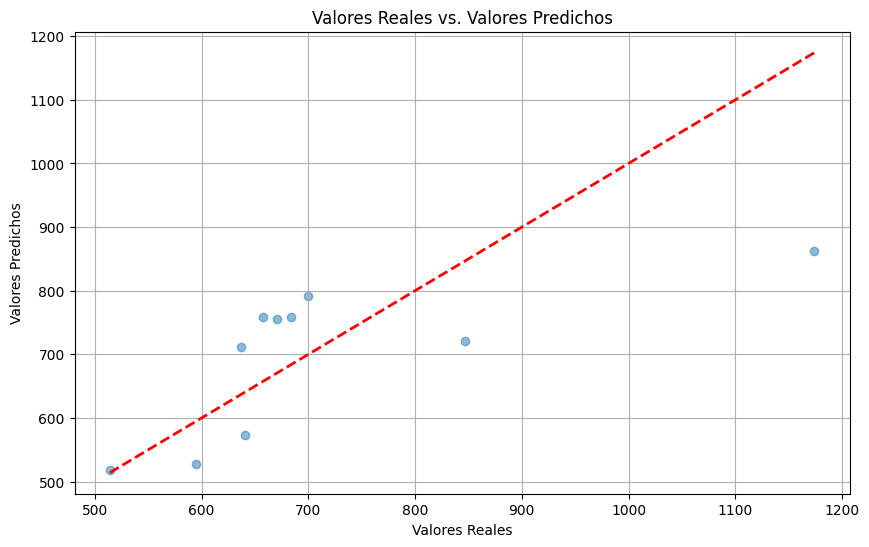

In [17]:
import matplotlib.pyplot as plt

# Graficar valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Línea de referencia ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos")
plt.grid(True)
plt.show()

In [15]:
!pip install scikit-learn

In [16]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Ya tenemos X_train, X_test, y_train, y_test de pasos anteriores

# Diccionario para almacenar los modelos y sus métricas
modelos = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Almacenar resultados
    resultados[nombre] = {"MSE": mse, "MAE": mae, "R2": r2}

# Mostrar resultados
print("Resultados de los modelos:")
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)

Resultados de los modelos:
                            MSE         MAE        R2
Linear Regression   8526.105562   74.569811  0.716508
Lasso               8523.451068   74.559217  0.716596
Ridge               8526.079175   74.570254  0.716509
Random Forest      15932.631560  100.396000  0.470242


In [13]:
# Mostrar coeficientes del modelo
coeficientes = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': modelo.coef_})
print("Coeficientes del Modelo:")
print(coeficientes)

# También puedes ver el intercepto
print(f"\nIntercepto: {modelo.intercept_:.2f}")

Coeficientes del Modelo:
           Variable  Coeficiente
0    ventas_previas     0.527085
1  gasto_publicidad     3.971969
2        temp_media   -10.217643
3    dias_hasta_nav     0.206480
4       competencia    -9.062540

Intercepto: -134.67


In [12]:
# Nuevos datos para predecir (ejemplo)
# Asegúrate de que las columnas coincidan con las usadas para entrenar el modelo
nuevos_datos = pd.DataFrame({
    'ventas_previas': [1500],
    'gasto_publicidad': [100],
    'temp_media': [8],
    'dias_hasta_nav': [45],
    'competencia': [3]
})

# Realizar la predicción
prediccion_nuevos_datos = modelo.predict(nuevos_datos)

print(f"La predicción de inventario para los nuevos datos es: {prediccion_nuevos_datos[0]:.2f}")

La predicción de inventario para los nuevos datos es: 953.52


In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 4. Evaluar el modelo
y_pred = modelo.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 8526.11
Error Absoluto Medio (MAE): 74.57
Coeficiente de determinación (R²): 0.72
